# sunpy's Timeseries and Map

In this session we will give a quick introduction to the two classes in sunpy used to hold data.


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.visualization import ImageNormalize

import sunpy.map
import sunpy.timeseries
from sunpy.data.sample import AIA_171_IMAGE, HMI_LOS_IMAGE, GOES_XRS_TIMESERIES, GBM_TIMESERIES

In [2]:
plt.rcParams['figure.figsize'] = (9, 9)

Maps from all instruments are created using the [`sunpy.map.Map` 'factory'](https://docs.sunpy.org/en/latest/code_ref/map.html#creating-map-objects). This class takes a wide variety of map-like inputs, for one or more maps and returns you one or many maps.
All maps, irrespective of the instrument, behave the same and expose the same functions and properties, however, depending on the instrument different metadata might be read or corrections made.
One example of this is to avoid inaccuracies in the observer position coordinate for AIA data the `HAE[XYZ]_OBS` keys rather than the usual default `HGLN/HGLT`.

In [3]:
AIA_171_IMAGE

'/home/jovyan/.local/share/sunpy/AIA20110607_063302_0171_lowres.fits'

In [4]:
aia171 = sunpy.map.Map(AIA_171_IMAGE)

Observatory,SDO
Instrument,AIA 3
Detector,AIA
Measurement,171.0 Angstrom
Wavelength,171.0 Angstrom
Observation Date,2011-06-07 06:33:02
Exposure Time,0.234256 s
Dimension,[1024. 1024.] pix
Coordinate System,helioprojective
Scale,[2.402792 2.402792] arcsec / pix
Reference Pixel,[511.5 511.5] pix

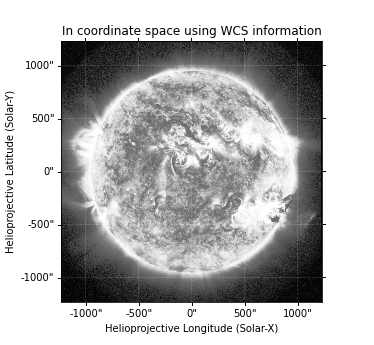
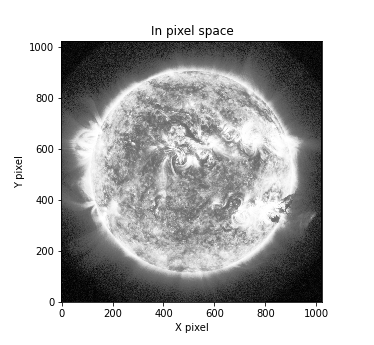
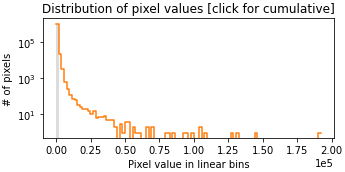
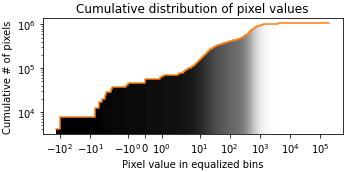

In [5]:
aia171

`Map` provides customized loaders [for a number](https://docs.sunpy.org/en/stable/code_ref/map.html#id3) of different instruments, however, if your data follows the FITS data standards for coordinate information etc then map should be able to read it by default.

### Metadata

To provide a consistent interface to useful metadata about an image over all different instruments, `Map` has [a set of attributes](https://docs.sunpy.org/en/latest/api/sunpy.map.GenericMap.html) which give access to common metadata.
Some examples of these are:

In [6]:
# The instrument name (normally INSTRUME in a FITS header)
aia171.instrument

'AIA 3'

In [7]:
# The radius of the sun in angular and distance units
aia171.rsun_obs

<Quantity 945.436711 arcsec>

In [8]:
aia171.rsun_meters

<Quantity 6.96e+08 m>

In [9]:
# The loc
aia171.observer_coordinate

<SkyCoord (HeliographicStonyhurst: obstime=2011-06-07T06:33:02.770, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.00406308, 0.04787238, 1.51846026e+11)>

In [10]:
# The coordinate frame of the data
aia171.coordinate_frame

<Helioprojective Frame (obstime=2011-06-07T06:33:02.770, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2011-06-07T06:33:02.770, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.00406308, 0.04787238, 1.51846026e+11)>)>

In [11]:
# The astropy.wcs object used internally to convert from world to pixel coordinates
aia171.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'HPLN-TAN'  'HPLT-TAN'  
CRVAL : 0.00089530541880571  0.00038493926472939  
CRPIX : 512.5  512.5  
PC1_1 PC1_2  : 0.99999706448085  0.0024230207763071  
PC2_1 PC2_2  : -0.0024230207763071  0.99999706448085  
CDELT : 0.00066744222222222  0.00066744222222222  
NAXIS : 1024  1024

All the underlying metadata can be accessed with `.meta`

In [12]:
aia171.meta

MetaDict([('simple', True),
          ('bitpix', -32),
          ('naxis', 2),
          ('naxis1', 1024),
          ('naxis2', 1024),
          ('pcount', 0),
          ('gcount', 1),
          ('xtension', 'BINTABLE'),
          ('bld_vers', 'V5R12X'),
          ('lvl_num', 1.5),
          ('t_rec', '2011-06-07T06:33:03Z'),
          ('trecstep', 1.0),
          ('trecepoc', '1977.01.01_00:00:00_TAI'),
          ('trecroun', 1),
          ('origin', 'SDO'),
          ('date', '2012-10-16T19:45:34'),
          ('telescop', 'SDO'),
          ('instrume', 'AIA_3'),
          ('date-obs', '2011-06-07T06:33:02.77'),
          ('t_obs', '2011-06-07T06:33:02.88Z'),
          ('camera', 3),
          ('img_type', 'LIGHT'),
          ('exptime', 0.234256),
          ('expsdev', 0.000135),
          ('int_time', 0.507812),
          ('wavelnth', 171),
          ('waveunit', 'angstrom'),
          ('wave_str', '171_THIN'),
          ('fsn', 27194331),
          ('fid', 0),
          ('quallev0'

### Plotting

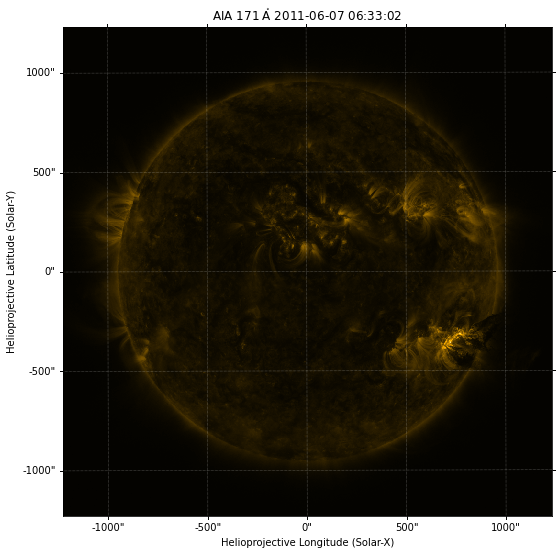

In [13]:
plt.figure()
aia171.plot()

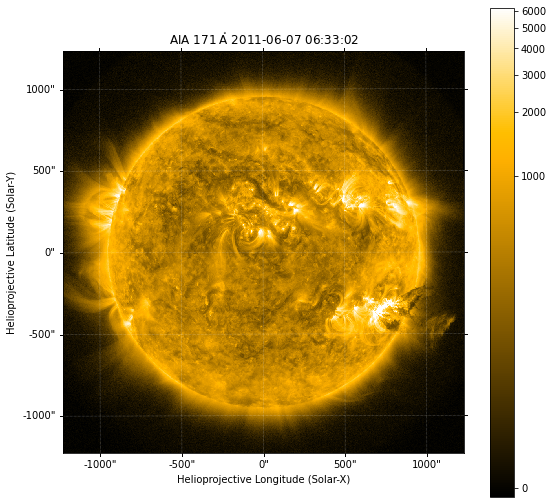

In [14]:
fig = plt.figure()
im = aia171.plot(clip_interval=[1, 99.9]*u.percent)
fig.colorbar(im)

(probably remove this as we'll walk through overplotting coordinates in the PFSS section)

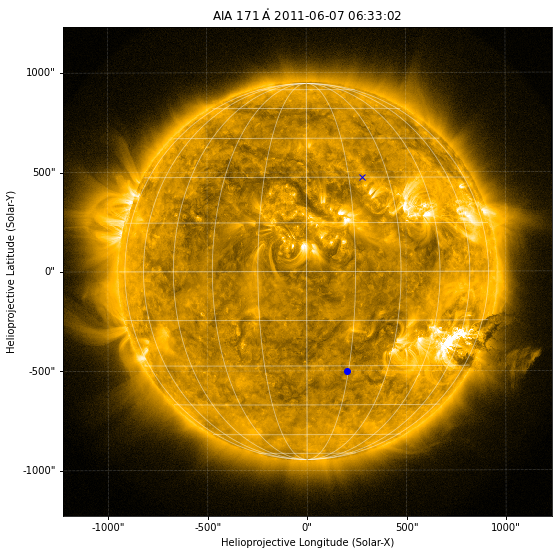

In [15]:
fig = plt.figure()

ax = fig.add_subplot(projection=aia171)
aia171.plot(axes=ax, clip_interval=[1, 99.9]*u.percent)

aia171.draw_grid(axes=ax)

ax.plot_coord(SkyCoord(200*u.arcsec, -500*u.arcsec, frame=aia171.coordinate_frame), marker='o', color='b')

ax.plot_coord(SkyCoord(20*u.deg, 30*u.deg, frame='heliographic_stonyhurst'), marker='x', color='b')

## Overplotting and Aligning Multiple Maps

In this example we are going to work with an AIA and a HMI image simultaneously to demonstrate the coordinate aware nature of sunpy's maps.
These data are used as a well known example of unaligned data.

In [16]:
aia171, hmilos = sunpy.map.Map(AIA_171_IMAGE, HMI_LOS_IMAGE)

Observatory,SDO
Instrument,HMI FRONT2
Detector,HMI
Measurement,magnetogram
Wavelength,6173.0
Observation Date,2011-06-07 06:32:11
Exposure Time,Unknown
Dimension,[1024. 1024.] pix
Coordinate System,helioprojective
Scale,[2.01714 2.01714] arcsec / pix
Reference Pixel,[511.5 511.5] pix

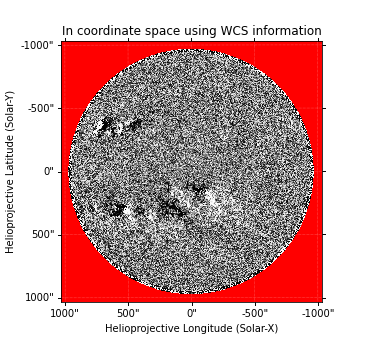
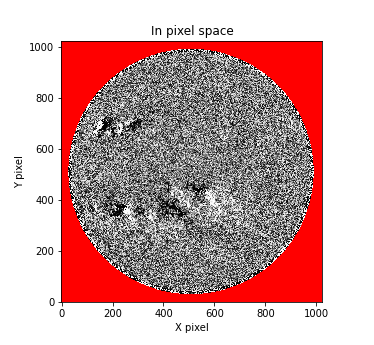
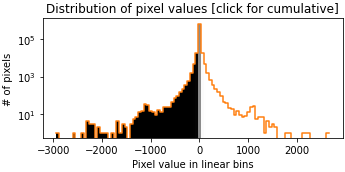
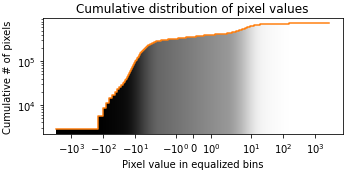

In [17]:
hmilos

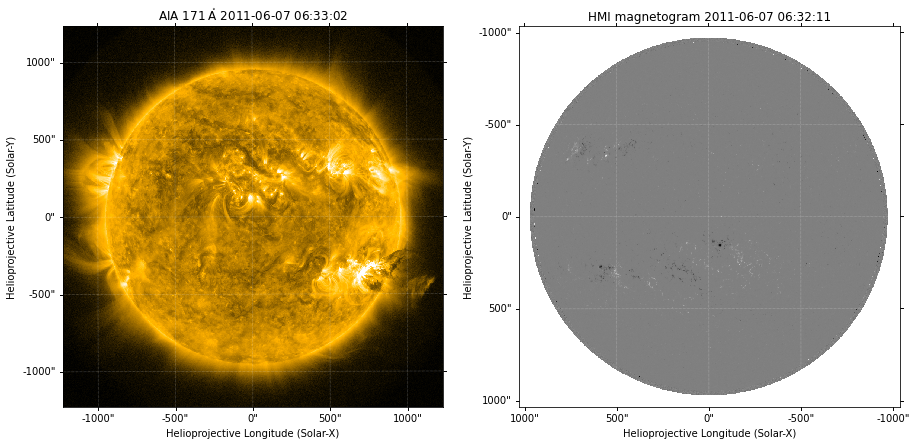

In [21]:
fig = plt.figure(figsize=(15, 9))
ax1 = fig.add_subplot(1, 2, 1, projection=aia171)
aia171.plot(axes=ax1, clip_interval=[1, 99.9]*u.percent)

ax2 = fig.add_subplot(1, 2, 2, projection=hmilos)
hmilos_norm = ImageNormalize(vmin=-1500,vmax=1500,)
hmilos.plot(axes=ax2, norm=hmilos_norm)

### Alignment with contours

In [22]:
n = 11
lim = 800 * u.Gauss
levels = np.linspace(-1 * lim, lim, n)
# Remove 0
levels = np.delete(levels, (n-1)//2)

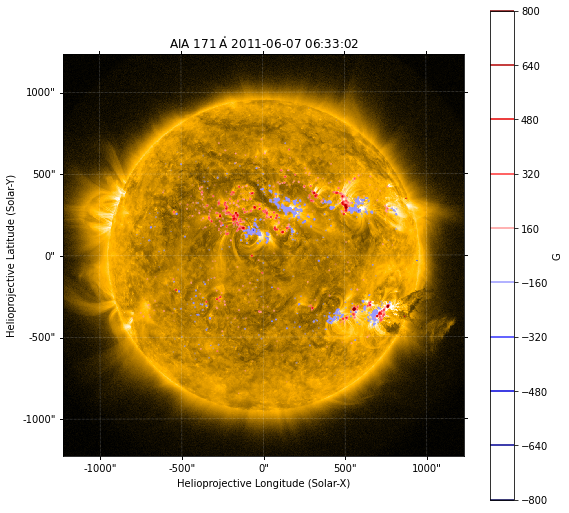

In [23]:
fig = plt.figure()
ax = fig.add_subplot(projection=aia171)

im = aia171.plot(axes=ax, clip_interval=[1, 99.9]*u.percent)
lines = hmilos.draw_contours(levels, cmap="seismic", axes=ax)

fig.colorbar(lines, ticks=levels, label=u.Gauss)

### Overplotting images

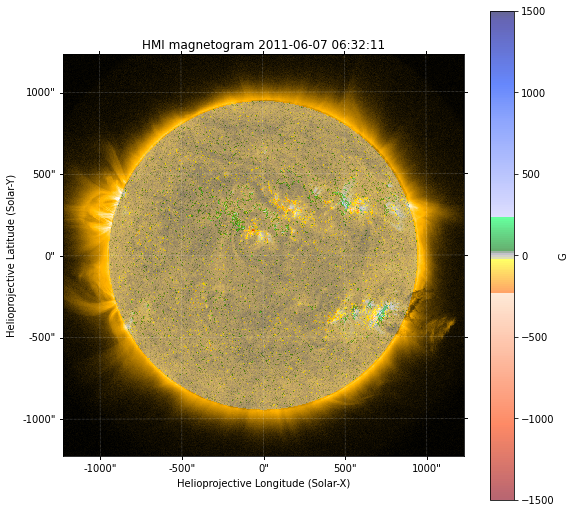

In [24]:
fig = plt.figure()
ax = plt.subplot(projection=aia171)

im1 = aia171.plot(axes=ax, clip_interval=[1, 99.9]*u.percent)
im2 = hmilos.plot(axes=ax, norm=hmilos_norm, cmap="hmimag", autoalign=True, alpha=0.6)

fig.colorbar(im2, label=u.Gauss)

For an example of co-aligning images not just for plotting see the example in the sunpy gallery on [Aligning AIA and HMI Data with Reproject](https://docs.sunpy.org/en/latest/generated/gallery/map_transformations/reprojection_align_aia_hmi.html).

## Timeseries Data

sunpy's `TimeSeries` class provides some convience wrappers around a [pandas DataFrame](https://pandas.pydata.org/docs/reference/frame.html), including tracking the full metadata dictionary associated with each column, the units of each column and some plotting helpers.
`TimeSeries` supports a [number of different sources](https://docs.sunpy.org/en/stable/code_ref/timeseries.html#id1) of data for which it has customized loaders.

In these short examples we will load two different time series data and briefly demonstrate some of the available functionality, as well as how to access and manipulate the underlying `DataFrame`.

In [25]:
GOES_XRS_TIMESERIES

'/home/jovyan/.local/share/sunpy/go1520110607.fits'

In [26]:
xrsts = sunpy.timeseries.TimeSeries(GOES_XRS_TIMESERIES)

<sunpy.timeseries.sources.goes.XRSTimeSeries object at 0x7f2a19599d00>
|-------------------------------------------------------------------------------------------------|
|TimeRange                  | Columns         | Meta                                              |
|-------------------------------------------------------------------------------------------------|
|2011-06-06T23:59:59.961999 | xrsa            | simple: True                                      |
|            to             | xrsb            | bitpix: 8                                         |
|2011-06-07T23:59:57.631999 |                 | naxis: 0                                          |
|                           |                 | extend: True                                      |
|                           |                 | date: 26/06/2012                                  |
|                           |                 | numext: 3                                         |
|                           |                 | telescop: GOES 15                                 |
|                           |                 | instrume: X-ray Detector                          |
|                           |                 | object: Sun                                       |
|                           |                 | origin: SDAC/GSFC                                 |
|                           |                 | ...                                               |
|-------------------------------------------------------------------------------------------------|

                                       xrsa          xrsb
2011-06-06 23:59:59.961999893  1.000000e-09  1.887100e-07
2011-06-07 00:00:02.008999944  1.000000e-09  1.834600e-07
2011-06-07 00:00:04.058999896  1.000000e-09  1.860900e-07
2011-06-07 00:00:06.104999900  1.000000e-09  1.808400e-07
2011-06-07 00:00:08.151999950  1.000000e-09  1.860900e-07
...                                     ...           ...
2011-06-07 23:59:49.441999912  1.000000e-09  1.624800e-07
2011-06-07 23:59:51.488999844  1.000000e-09  1.624800e-07
2011-06-07 23:59:53.538999915  1.000000e-09  1.598500e-07
2011-06-07 23:59:55.584999919  1.000000e-09  1.624800e-07
2011-06-07 23:59:57.631999850  1.000000e-09  1.598500e-07

[42177 rows x 2 columns]
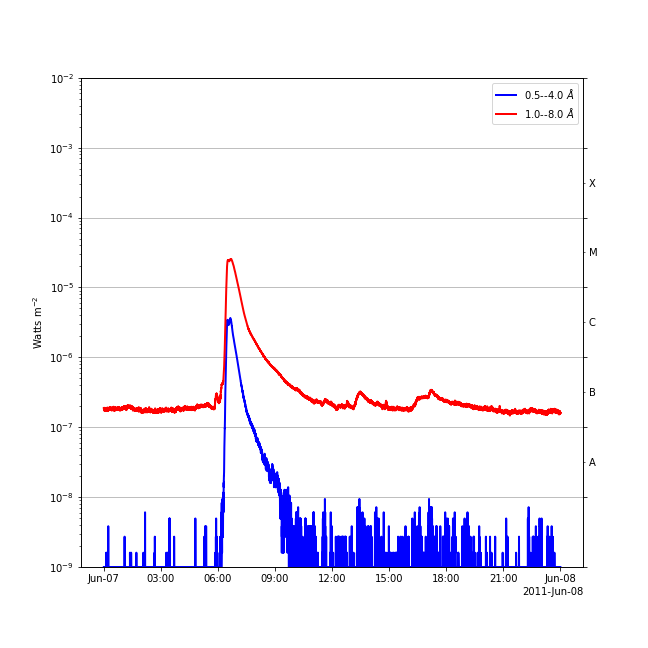

In [28]:
xrsts

In [29]:
xrsts.meta

|-------------------------------------------------------------------------------------------------|
|TimeRange                  | Columns         | Meta                                              |
|-------------------------------------------------------------------------------------------------|
|2011-06-06T23:59:59.961999 | xrsa            | simple: True                                      |
|            to             | xrsb            | bitpix: 8                                         |
|2011-06-07T23:59:57.631999 |                 | naxis: 0                                          |
|                           |                 | extend: True                                      |
|                           |                 | date: 26/06/2012                                  |
|                           |                 | numext: 3                                         |
|                           |                 | telescop: GOES 15                                 |


In [30]:
xrsts.units

OrderedDict([('xrsa', Unit("W / m2")), ('xrsb', Unit("W / m2"))])

In [31]:
xrsts.quantity('xrsa')

<Quantity [1.e-09, 1.e-09, 1.e-09, ..., 1.e-09, 1.e-09, 1.e-09] W / m2>

In [32]:
df = xrsts.to_dataframe()

In [33]:
df

,xrsa,xrsb
2011-06-06 23:59:59.961999893,1.000000e-09,1.887100e-07
2011-06-07 00:00:02.008999944,1.000000e-09,1.834600e-07
2011-06-07 00:00:04.058999896,1.000000e-09,1.860900e-07
2011-06-07 00:00:06.104999900,1.000000e-09,1.808400e-07
2011-06-07 00:00:08.151999950,1.000000e-09,1.860900e-07
...,...,...
2011-06-07 23:59:49.441999912,1.000000e-09,1.624800e-07
2011-06-07 23:59:51.488999844,1.000000e-09,1.624800e-07
2011-06-07 23:59:53.538999915,1.000000e-09,1.598500e-07
2011-06-07 23:59:55.584999919,1.000000e-09,1.624800e-07


In [34]:
df.resample("1h").sum()

,xrsa,xrsb
2011-06-06 23:00:00,1.000000e-09,1.887100e-07
2011-06-07 00:00:00,1.759672e-06,3.205648e-04
2011-06-07 01:00:00,1.768567e-06,3.263245e-04
2011-06-07 02:00:00,1.771219e-06,3.019378e-04
2011-06-07 03:00:00,1.817500e-06,3.112561e-04
2011-06-07 04:00:00,1.761945e-06,3.283550e-04
2011-06-07 05:00:00,1.807559e-06,3.711351e-04
2011-06-07 06:00:00,2.460876e-03,2.145224e-02
2011-06-07 07:00:00,4.844387e-04,7.767111e-03
2011-06-07 08:00:00,6.309636e-05,1.784878e-03


## Combining Multiple Timeseries

In this example we shall load both a GOES XRS and a Fermi GBM timeseries and inspect them together.

In [35]:
xrsts, gbmts = sunpy.timeseries.TimeSeries(GOES_XRS_TIMESERIES, GBM_TIMESERIES)

<sunpy.timeseries.sources.fermi_gbm.GBMSummaryTimeSeries object at 0x7f2a1aff0f70>
|-------------------------------------------------------------------------------------------------|
|TimeRange                  | Columns         | Meta                                              |
|-------------------------------------------------------------------------------------------------|
|2011-06-06T23:59:53.403285 | 4-15 keV        | simple: True                                      |
|            to             | 15-25 keV       | bitpix: 8                                         |
|2011-06-07T23:59:59.211769 | 25-50 keV       | naxis: 0                                          |
|                           | 50-100 keV      | extend: True                                      |
|                           | 100-300 keV     | comment: FITS (Flexible Image Transport System) fo|
|                           | 300-800 keV     | creator: GBM_SCI_Reader.pl v1.19                  |
|                           | 800-2000 keV    | filetype: PHAII                                   |
|                           |                 | file-ver: 1.0.0                                   |
|                           |                 | telescop: GLAST                                   |
|                           |                 | instrume: GBM                                     |
|                           |                 | ...                                               |
|-------------------------------------------------------------------------------------------------|

                                4-15 keV  15-25 keV  25-50 keV  50-100 keV  \
2011-06-06 23:59:53.403285980  19.797998  27.191975  11.250072    3.447282   
2011-06-06 23:59:57.499285996  17.619101  26.767460  11.593772    3.252513   
2011-06-07 00:00:01.595348001  18.993319  28.145748  11.368239    3.385645   
2011-06-07 00:00:05.691410005  18.475089  28.222369  11.517004    3.338647   
2011-06-07 00:00:09.787469983  18.757573  29.313696  12.346636    3.709719   
...                                  ...        ...        ...         ...   
2011-06-07 23:59:42.827513993  16.574438  26.908157  10.928199    3.314166   
2011-06-07 23:59:46.923573971  17.237341  28.024693  11.406486    3.561565   
2011-06-07 23:59:51.019649982  17.711683  25.741046  12.032128    3.361610   
2011-06-07 23:59:55.115710020  18.137015  26.381265  11.347018    3.347057   
2011-06-07 23:59:59.211769998  16.988311  27.263327  11.055091    3.278708   

                               100-300 keV  300-800 keV  800-2000 keV  
2011-06-06 23:59:53.403285980     0.966310     0.142158      0.084771  
2011-06-06 23:59:57.499285996     0.859868     0.147665      0.084783  
2011-06-07 00:00:01.595348001     0.907045     0.130197      0.083965  
2011-06-07 00:00:05.691410005     0.897524     0.140200      0.084387  
2011-06-07 00:00:09.787469983     0.911956     0.143676      0.086817  
...                                    ...          ...           ...  
2011-06-07 23:59:42.827513993     0.921563     0.130694      0.086200  
2011-06-07 23:59:46.923573971     0.871861     0.136672      0.080706  
2011-06-07 23:59:51.019649982     0.914250     0.125200      0.077657  
2011-06-07 23:59:55.115710020     0.905701     0.127684      0.084969  
2011-06-07 23:59:59.211769998     0.888133     0.132219      0.074955  

[19775 rows x 7 columns]
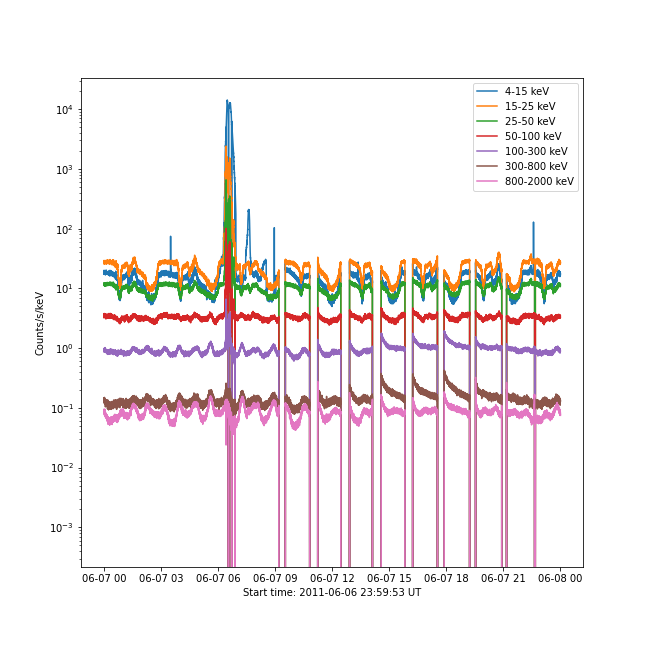

In [36]:
gbmts

In [37]:
gbmts.meta

|-------------------------------------------------------------------------------------------------|
|TimeRange                  | Columns         | Meta                                              |
|-------------------------------------------------------------------------------------------------|
|2011-06-06T23:59:53.403285 | 4-15 keV        | simple: True                                      |
|            to             | 15-25 keV       | bitpix: 8                                         |
|2011-06-07T23:59:59.211769 | 25-50 keV       | naxis: 0                                          |
|                           | 50-100 keV      | extend: True                                      |
|                           | 100-300 keV     | comment: FITS (Flexible Image Transport System) fo|
|                           | 300-800 keV     | creator: GBM_SCI_Reader.pl v1.19                  |
|                           | 800-2000 keV    | filetype: PHAII                                   |


Using the extract method we can make a new `TimeSeries` object with a single column.

In [38]:
gbm25 = gbmts.extract("25-50 keV")

<sunpy.timeseries.timeseriesbase.GenericTimeSeries object at 0x7f2a1afcefd0>
|-------------------------------------------------------------------------------------------------|
|TimeRange                  | Columns         | Meta                                              |
|-------------------------------------------------------------------------------------------------|
|2011-06-06T23:59:53.403285 | 25-50 keV       | simple: True                                      |
|            to             |                 | bitpix: 8                                         |
|2011-06-07T23:59:59.211769 |                 | naxis: 0                                          |
|                           |                 | extend: True                                      |
|                           |                 | comment: FITS (Flexible Image Transport System) fo|
|                           |                 | creator: GBM_SCI_Reader.pl v1.19                  |
|                           |                 | filetype: PHAII                                   |
|                           |                 | file-ver: 1.0.0                                   |
|                           |                 | telescop: GLAST                                   |
|                           |                 | instrume: GBM                                     |
|                           |                 | ...                                               |
|-------------------------------------------------------------------------------------------------|

                               25-50 keV
2011-06-06 23:59:53.403285980  11.250072
2011-06-06 23:59:57.499285996  11.593772
2011-06-07 00:00:01.595348001  11.368239
2011-06-07 00:00:05.691410005  11.517004
2011-06-07 00:00:09.787469983  12.346636
...                                  ...
2011-06-07 23:59:42.827513993  10.928199
2011-06-07 23:59:46.923573971  11.406486
2011-06-07 23:59:51.019649982  12.032128
2011-06-07 23:59:55.115710020  11.347018
2011-06-07 23:59:59.211769998  11.055091

[19775 rows x 1 columns]
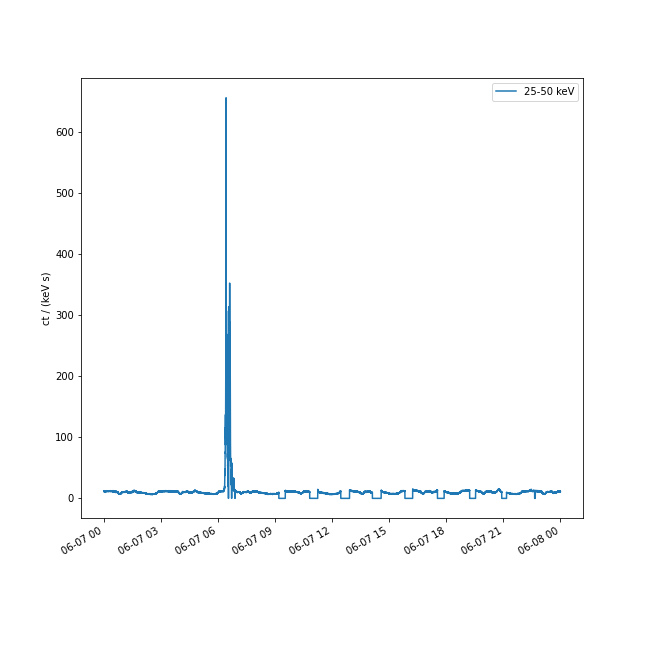

In [40]:
gbm25

<AxesSubplot:ylabel='ct / (keV s)'>

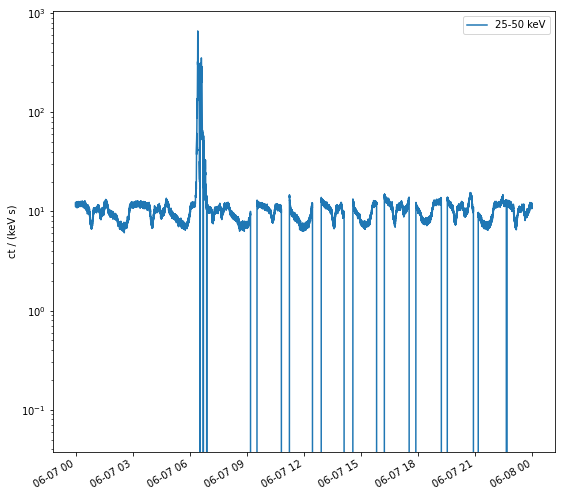

In [39]:
gbm25.plot(logy=True)

An example of manipulating the underlying dataframe is to mask out values below a threshold.

In [41]:
df = gbm25.to_dataframe()
df = df.mask(df < 10)

We can then construct a new timeseries using this modified dataframe, with the same units and metadata as the original.

In [42]:
gbm25 = sunpy.timeseries.TimeSeries(df, gbm25.meta, gbm25.units)

<sunpy.timeseries.sources.fermi_gbm.GBMSummaryTimeSeries object at 0x7f2a1b61ffd0>
|-------------------------------------------------------------------------------------------------|
|TimeRange                  | Columns         | Meta                                              |
|-------------------------------------------------------------------------------------------------|
|2011-06-06T23:59:53.403285 | 25-50 keV       | simple: True                                      |
|            to             |                 | bitpix: 8                                         |
|2011-06-07T23:59:59.211769 |                 | naxis: 0                                          |
|                           |                 | extend: True                                      |
|                           |                 | comment: FITS (Flexible Image Transport System) fo|
|                           |                 | creator: GBM_SCI_Reader.pl v1.19                  |
|                           |                 | filetype: PHAII                                   |
|                           |                 | file-ver: 1.0.0                                   |
|                           |                 | telescop: GLAST                                   |
|                           |                 | instrume: GBM                                     |
|                           |                 | ...                                               |
|-------------------------------------------------------------------------------------------------|

                               25-50 keV
2011-06-06 23:59:53.403285980  11.250072
2011-06-06 23:59:57.499285996  11.593772
2011-06-07 00:00:01.595348001  11.368239
2011-06-07 00:00:05.691410005  11.517004
2011-06-07 00:00:09.787469983  12.346636
...                                  ...
2011-06-07 23:59:42.827513993  10.928199
2011-06-07 23:59:46.923573971  11.406486
2011-06-07 23:59:51.019649982  12.032128
2011-06-07 23:59:55.115710020  11.347018
2011-06-07 23:59:59.211769998  11.055091

[19775 rows x 1 columns]
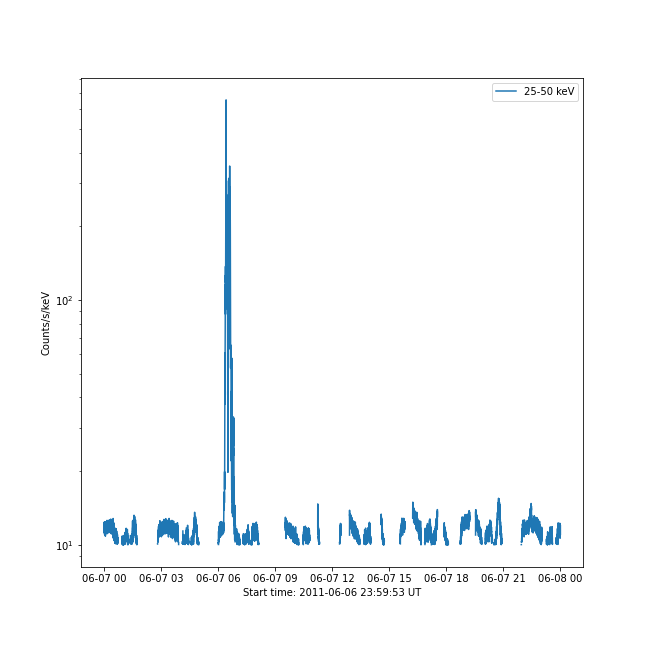

In [44]:
gbm25

Using the `concatenate` method we can add this GBM column to the XRS timeseries object.

In [45]:
combo = xrsts.concatenate(gbm25)

You can see that `TimeSeries` associates the metadata from the GBM file with the correct column and the metadata from the XRS file with the original two columns

In [46]:
combo.meta

|-------------------------------------------------------------------------------------------------|
|TimeRange                  | Columns         | Meta                                              |
|-------------------------------------------------------------------------------------------------|
|2011-06-06T23:59:53.403285 | 25-50 keV       | simple: True                                      |
|            to             |                 | bitpix: 8                                         |
|2011-06-07T23:59:59.211769 |                 | naxis: 0                                          |
|                           |                 | extend: True                                      |
|                           |                 | comment: FITS (Flexible Image Transport System) fo|
|                           |                 | creator: GBM_SCI_Reader.pl v1.19                  |
|                           |                 | filetype: PHAII                                   |


Finally, this example makes use of the unit information stored in `TimeSeries` to demonstrate Astropy's support for unit-aware plotting with matplotlib.

In [47]:
from astropy.visualization import quantity_support

In [48]:
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7f2a18360730>

If we now try to plot these three lines all on the same axis, an error will be raised because the units are incompatible.

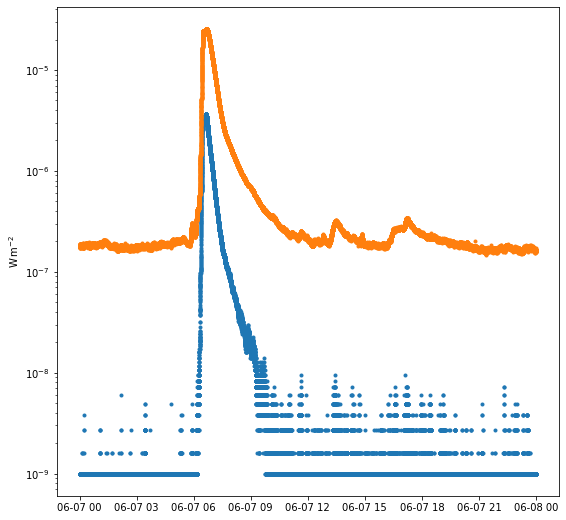

In [50]:
fig = plt.figure()
ax = fig.add_subplot()

ax.semilogy()
ax.plot_date(combo.index, combo.quantity('xrsa'), '.')
ax.plot_date(combo.index, combo.quantity('xrsb'), '.')

#ax.plot_date(combo.index, combo.quantity('25-50 keV'), '.', color='g')

We can plot both sets of data simultaneously by creating a second y axis on the right hand side of the plot.

Text(0.5, 0, '2011-06-06')

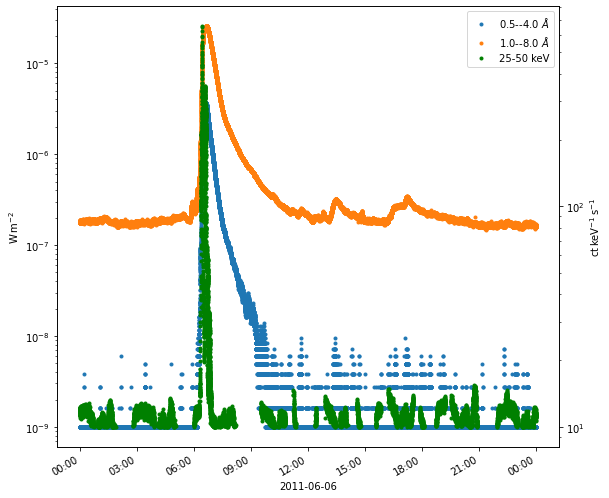

In [51]:
fig = plt.figure()

ax = fig.add_subplot()
ax.semilogy()
line1, = ax.plot_date(combo.index, combo.quantity('xrsa'), '.')
line2, = ax.plot_date(combo.index, combo.quantity('xrsb'), '.')

ax2 = ax.twinx()
ax2.semilogy()
line3, = ax2.plot_date(combo.index, combo.quantity('25-50 keV'), '.', color='g')

ax.legend([line1, line2, line3], [r'0.5--4.0 $\AA$', r'1.0--8.0 $\AA$', '25-50 keV'])

formatter = matplotlib.dates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(formatter)
fig.autofmt_xdate()

ax.set_xlabel(combo.index[0].date().isoformat())